In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

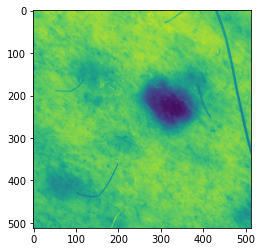

In [4]:
imshow(images[100])

In [5]:
masks.shape

(12311, 512, 512, 1)

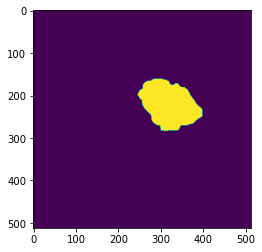

In [6]:
imshow(masks[100])

In [7]:
import sys
sys.path.append('../')
import gp2

In [8]:
from keras import losses

In [9]:
loss_fx = losses.BCE

In [10]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpx5iid0_ukuc_unet2d


In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [12]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpx5iid0_ukuc_unet2d
Verbose mode active!


In [13]:
R.classifier = C ### use custom classifier

In [14]:
R.setup_data(images, masks, dataset_size=12311, weights=weights)


Weights OK!


In [15]:
RUNS = 4

In [16]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier(batch_size=16)
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
39/39 [==============================] - 39s 683ms/step - loss: 0.5528 - dice_coeff: 0.3035 - val_loss: 0.5321 - val_dice_coeff: 0.3141
Epoch 2/100
39/39 [==============================] - 19s 486ms/step - loss: 0.4747 - dice_coeff: 0.3693 - val_loss: 0.4869 - val_dice_coeff: 0.4187
Epoch 3/100
39/39 [==============================] - 19s 494ms/step - loss: 0.4447 - dice_coeff: 0.4634 - val_loss: 0.4518 - val_dice_coeff: 0.5490
Epoch 4/100
39/39 [==============================] - 19s 488ms/step - loss: 0.4173 - dice_coeff: 0.5179 - val_loss: 0.4296 - val_dice_coeff: 0.5093
Epoch 5/100
39/39 [==============================] - 19s 484ms/step - loss: 0.4167 - dice_coeff: 0.5157 - val_loss: 0.4141 - val_dice_coeff: 0.5199
Epoch 6/100
39/39 [==============================] - 19s 483ms/step - loss: 0.4127 - dice_coeff: 0.5208 - val_loss: 0.4196 - val_dice_coeff: 0.4964
Epoch 7/100
39/39 [==============================] - 19s 499ms/step - loss: 0.4038 - dice_coeff: 0.52

In [17]:
R.classifier_scores # after 4 runs of GP2

[[0.4677988290786743, 0.5263292193412781],
 [0.4245705008506775, 0.5326502323150635],
 [0.43922528624534607, 0.5260268449783325],
 [0.42793935537338257, 0.5371383428573608]]

In [18]:
R.discriminator_scores # after 4 runs of GP2

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

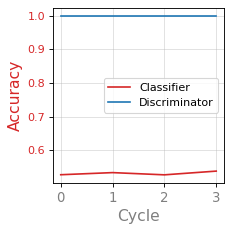

In [19]:
R.plot() # after 4 runs of GP2

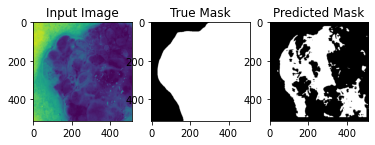

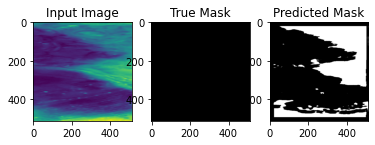

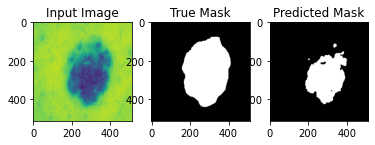

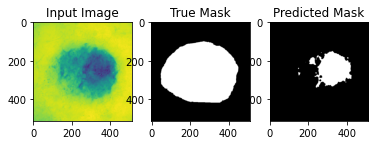

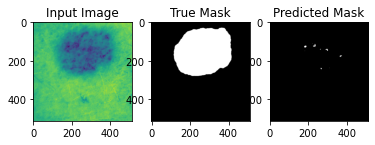

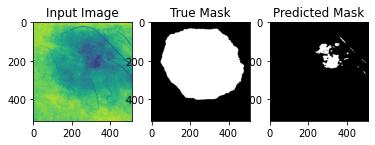

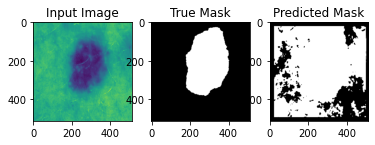

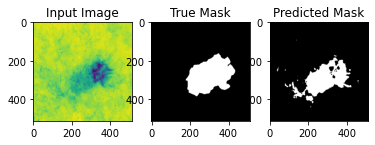

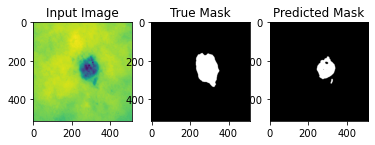

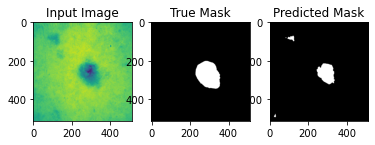

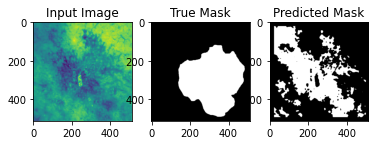

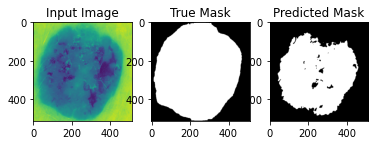

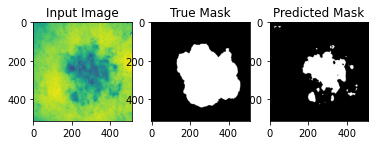

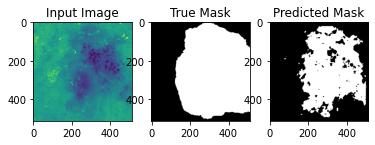

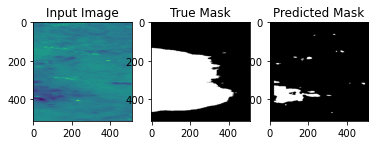

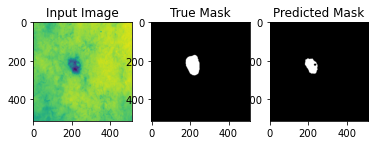

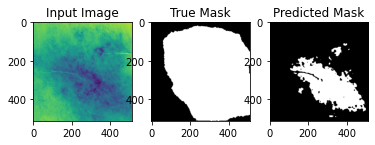

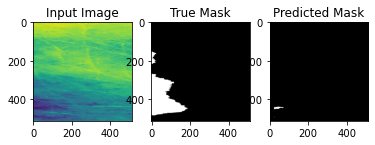

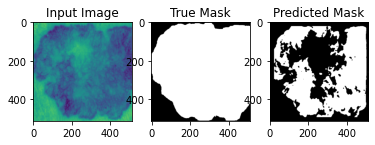

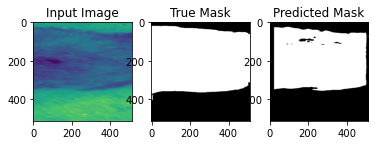

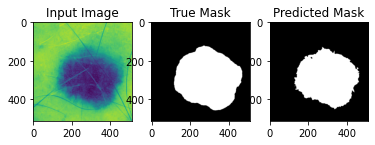

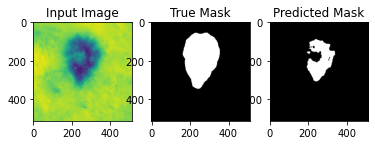

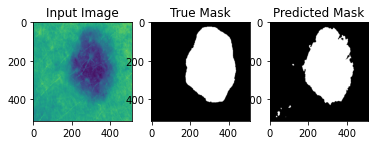

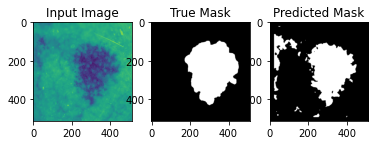

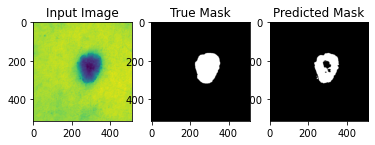

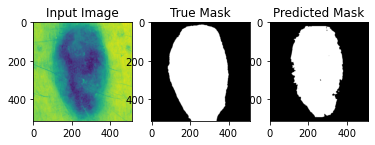

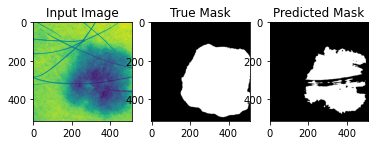

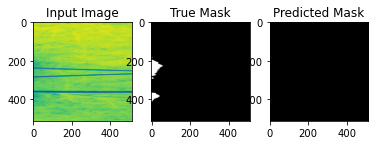

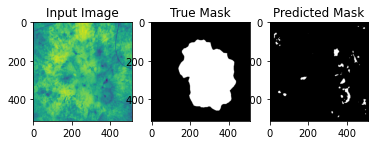

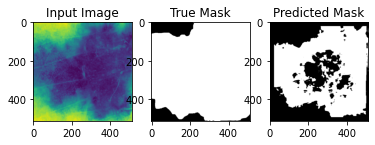

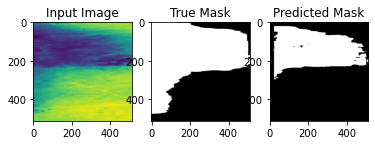

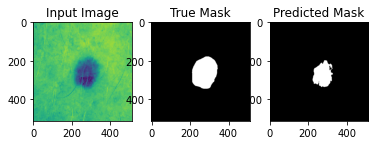

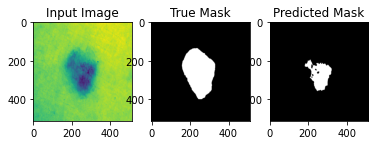

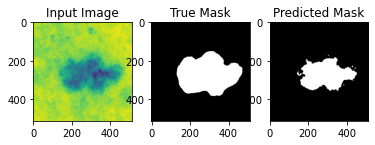

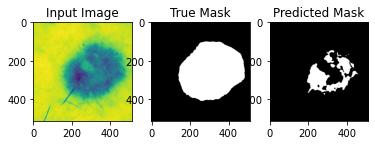

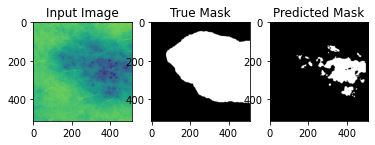

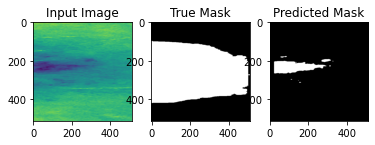

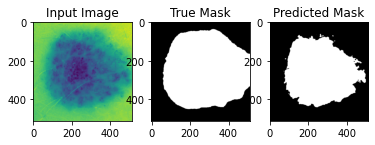

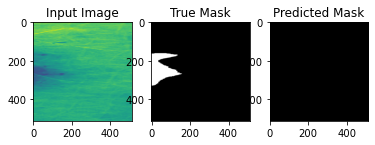

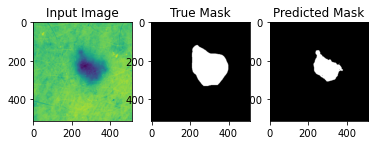

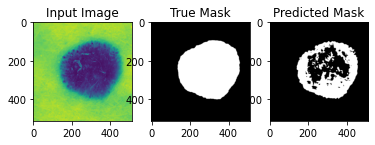

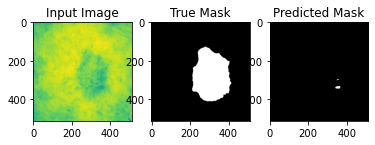

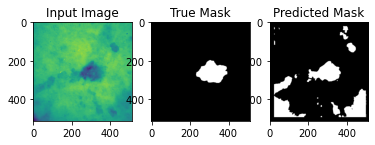

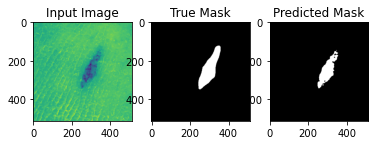

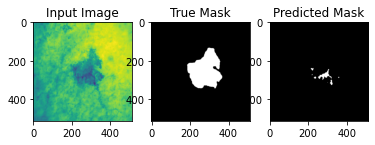

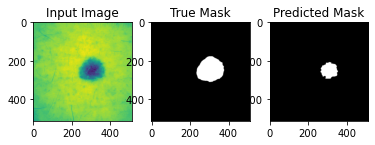

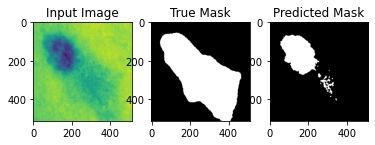

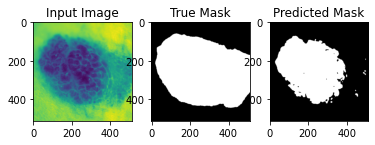

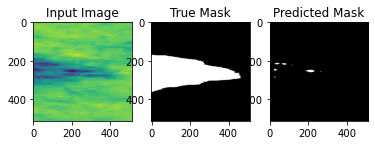

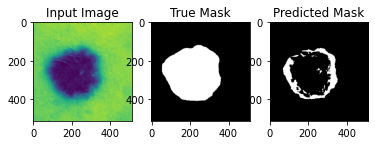

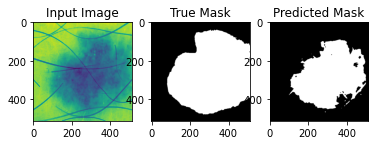

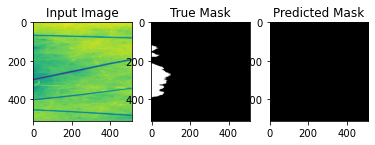

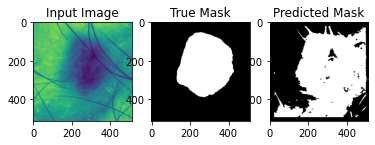

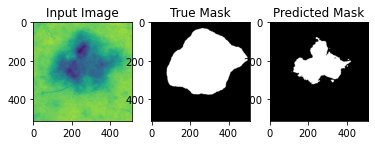

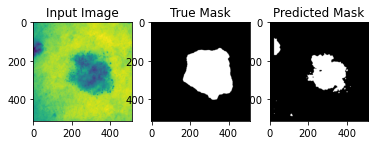

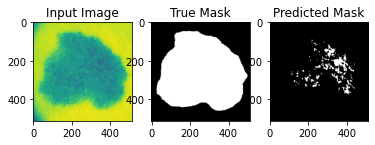

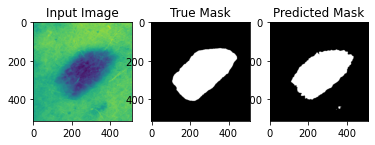

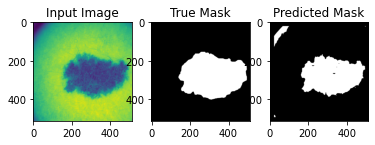

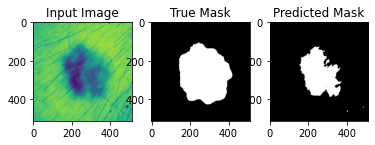

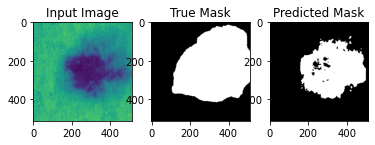

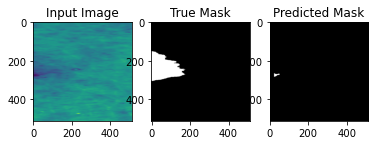

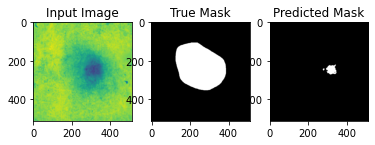

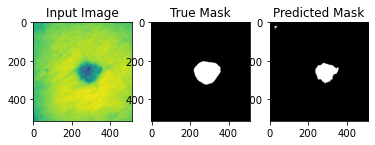

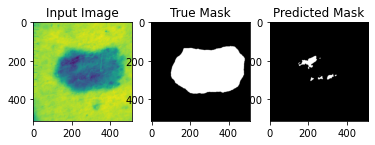

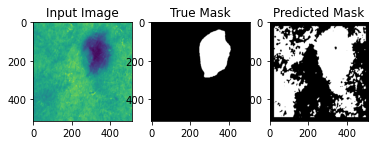

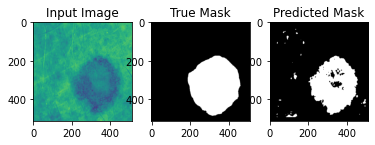

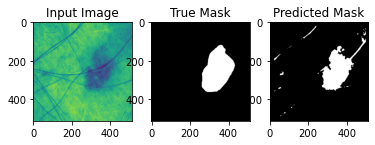

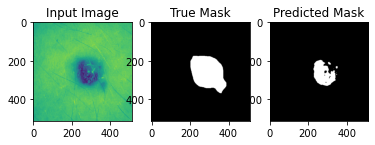

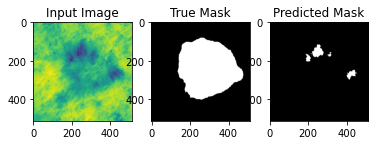

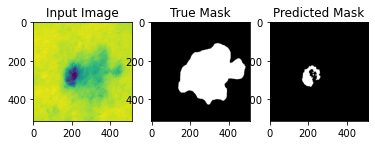

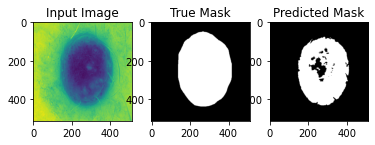

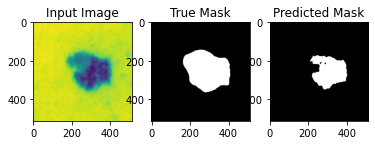

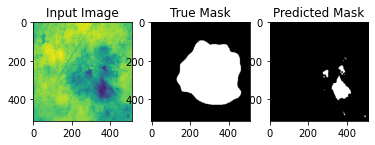

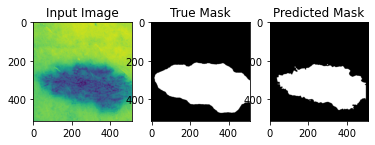

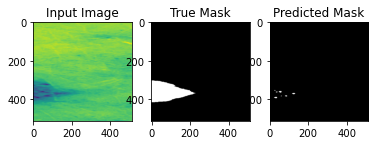

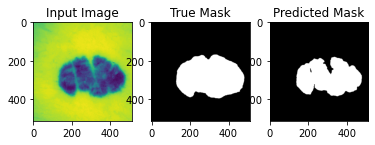

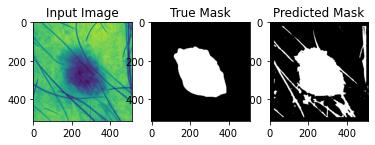

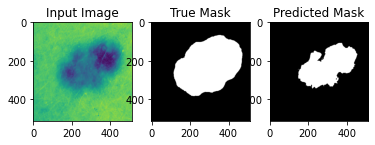

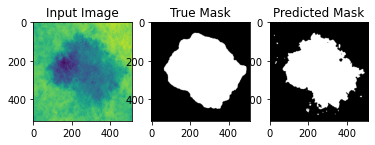

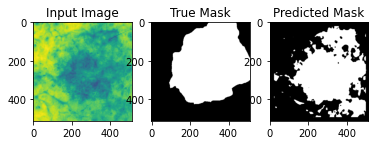

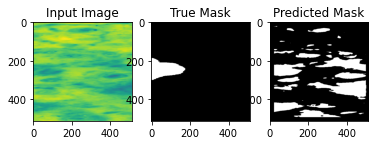

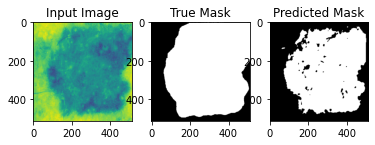

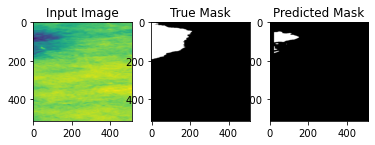

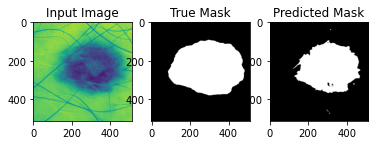

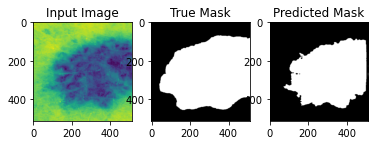

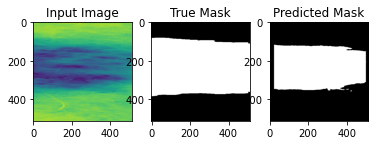

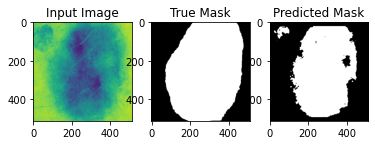

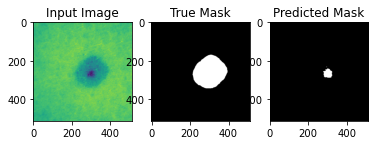

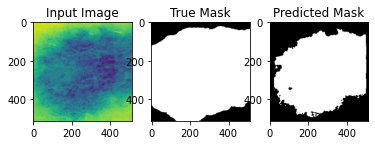

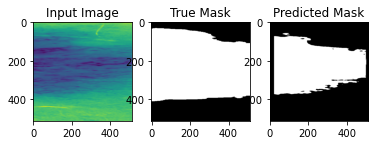

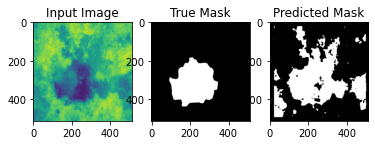

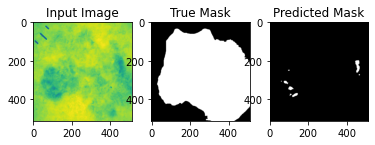

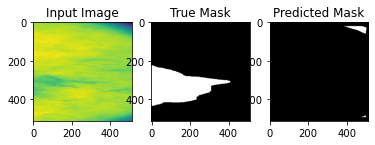

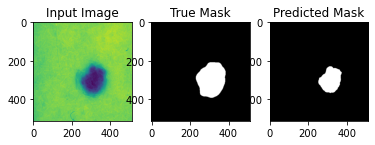

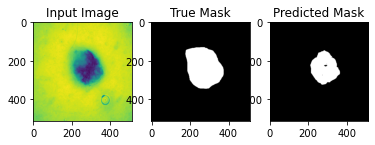

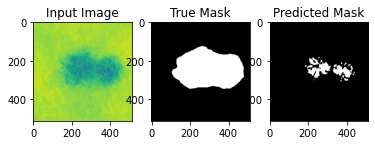

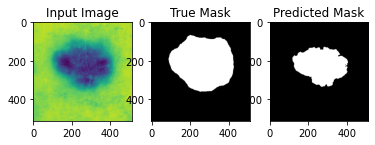

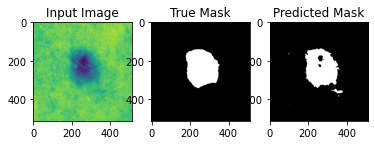

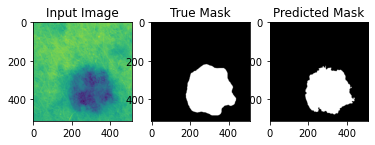

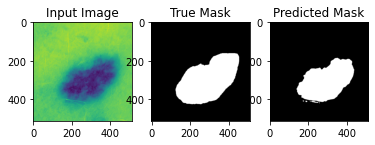

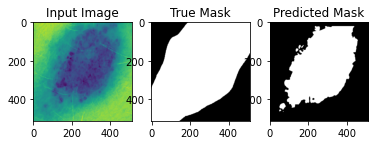

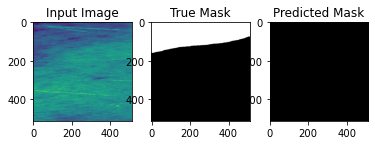

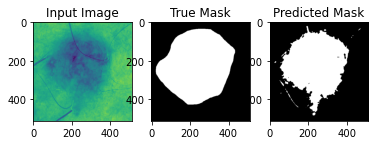

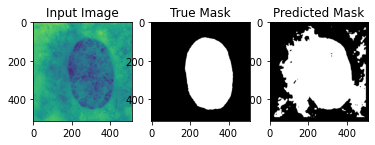

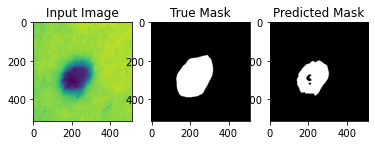

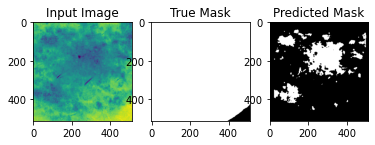

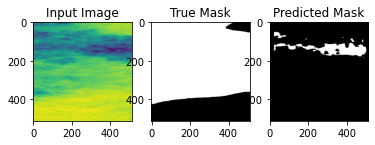

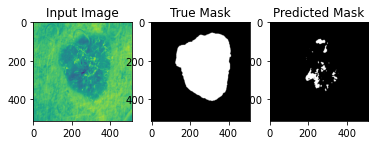

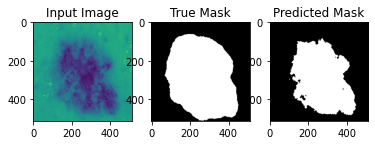

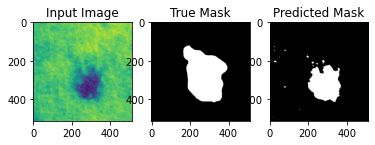

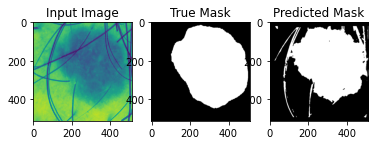

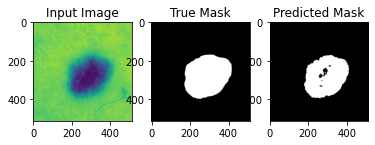

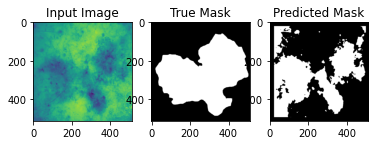

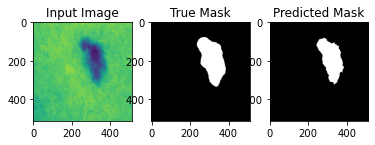

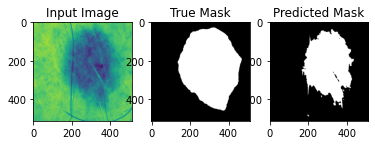

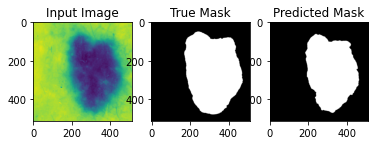

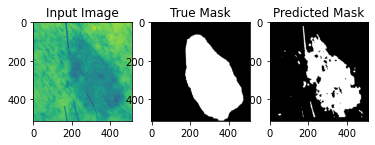

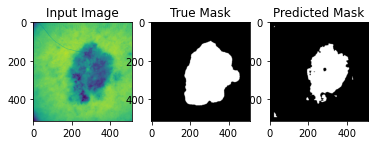

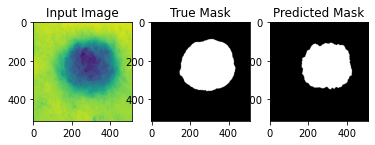

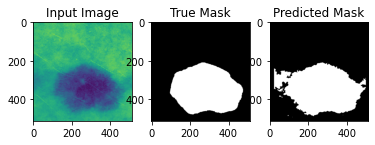

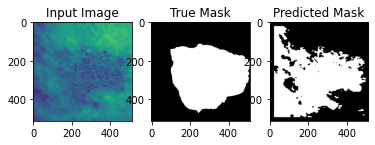

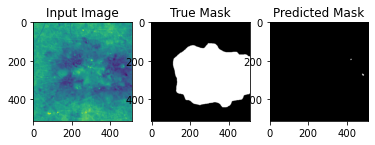

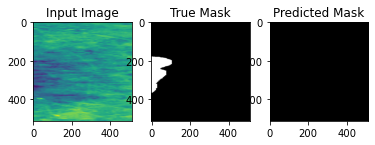

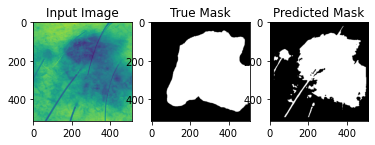

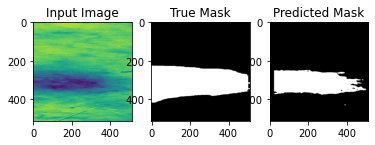

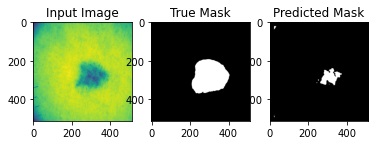

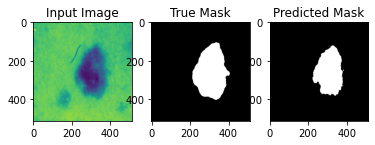

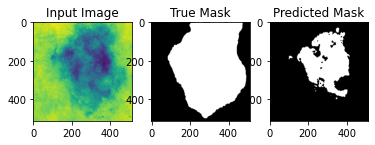

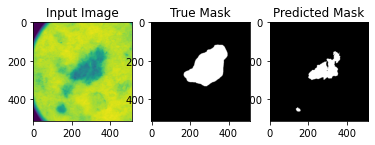

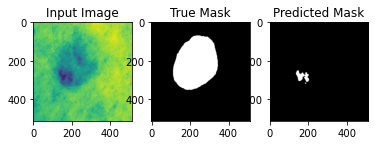

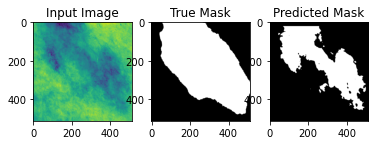

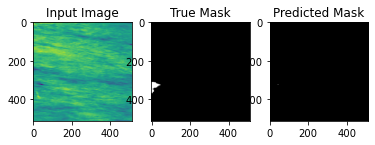

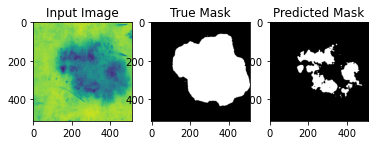

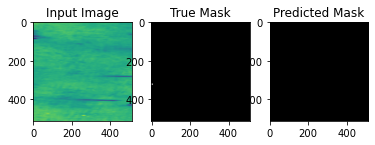

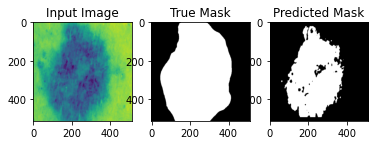

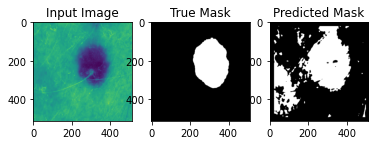

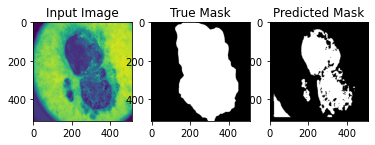

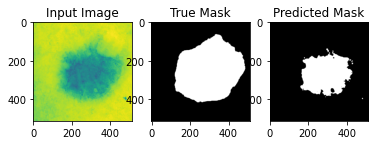

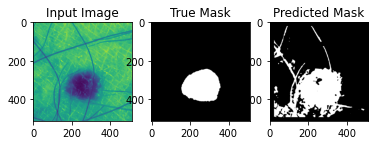

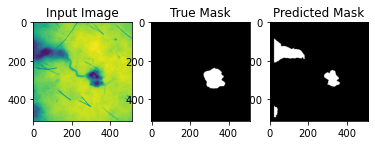

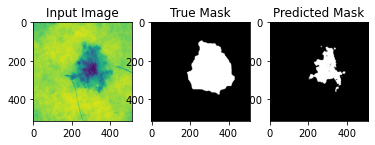

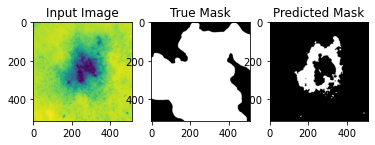

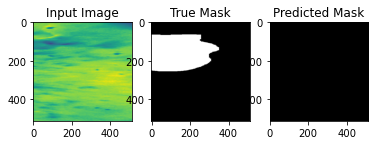

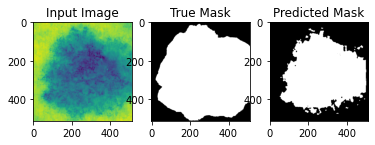

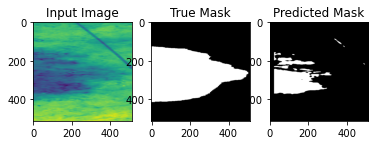

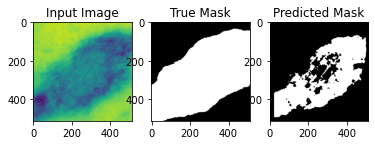

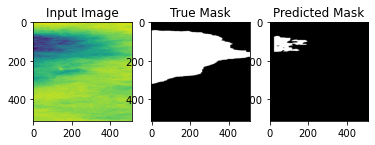

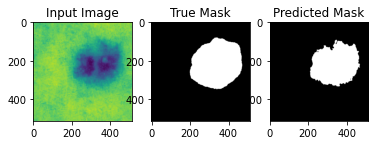

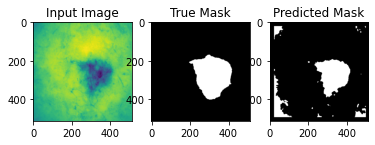

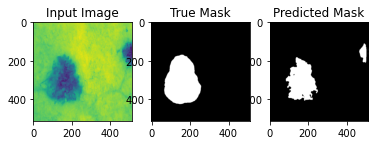

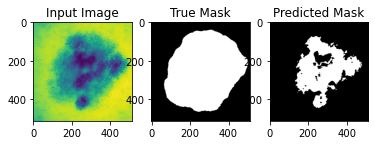

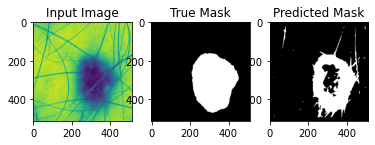

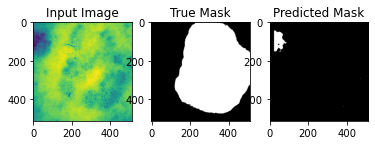

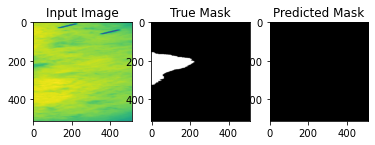

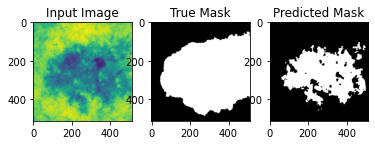

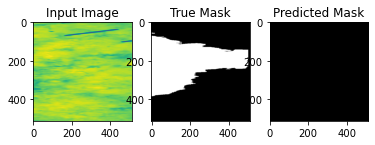

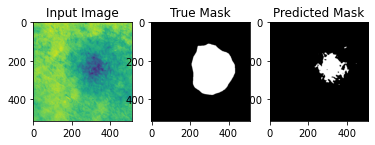

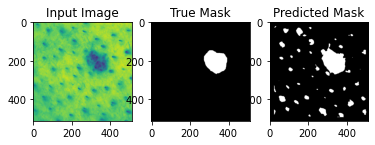

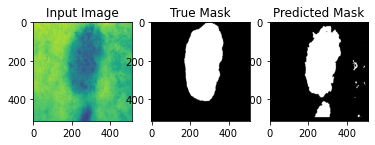

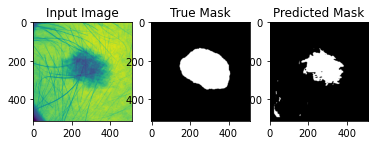

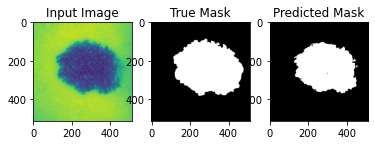

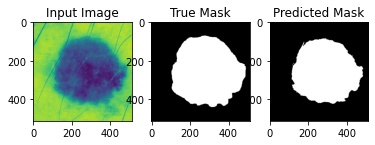

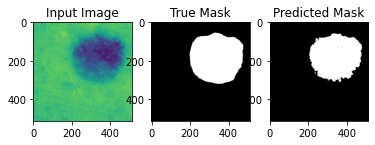

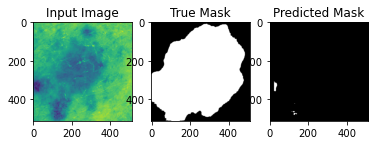

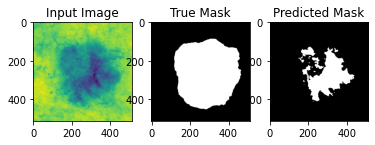

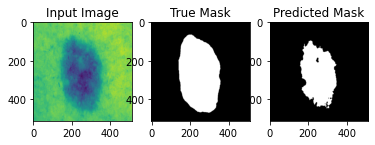

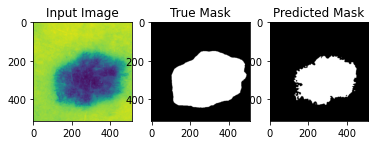

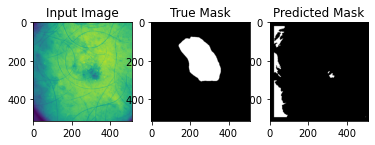

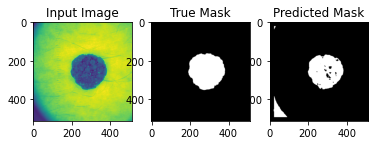

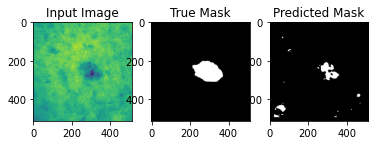

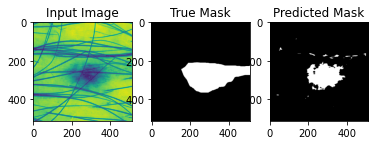

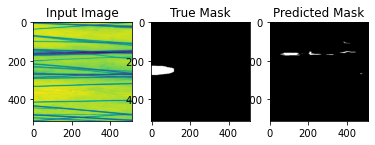

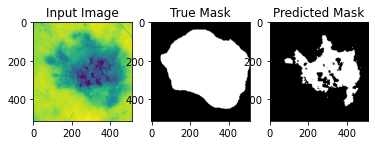

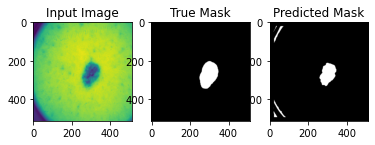

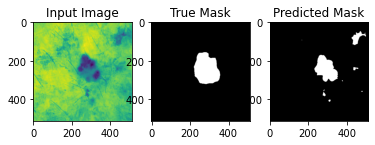

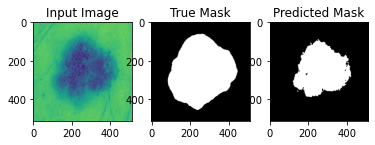

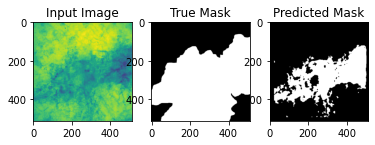

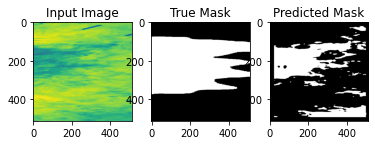

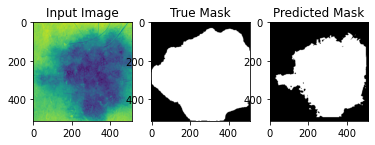

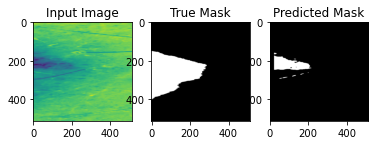

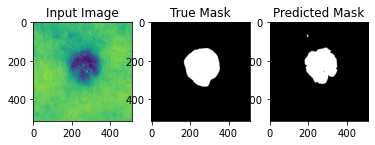

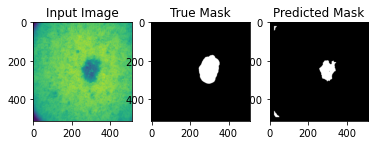

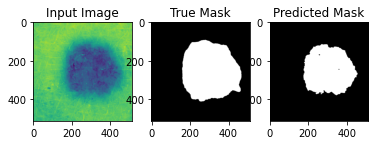

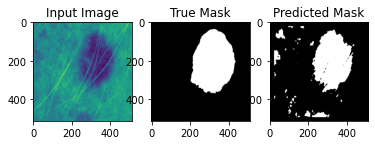

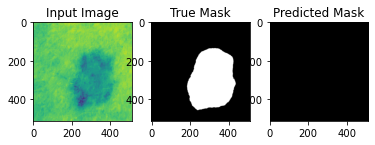

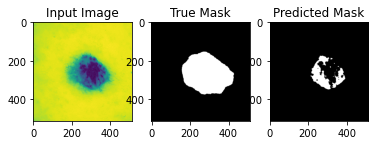

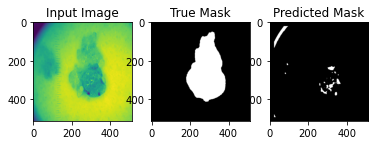

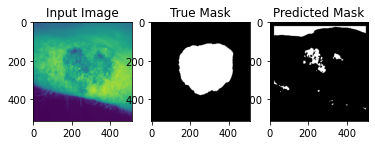

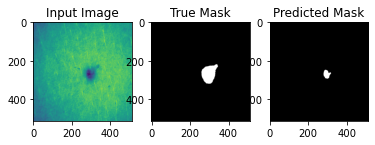

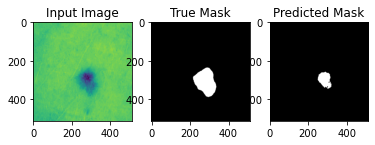

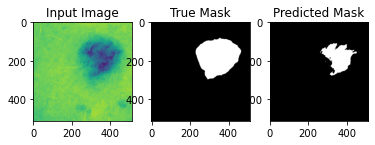

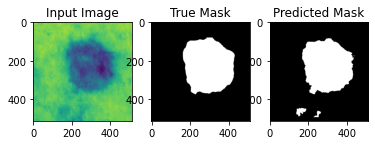

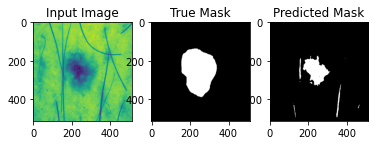

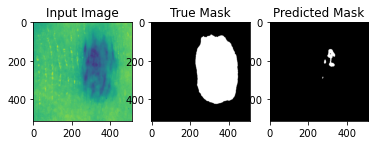

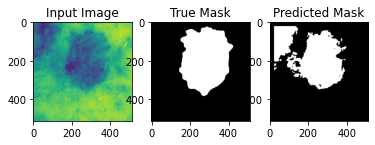

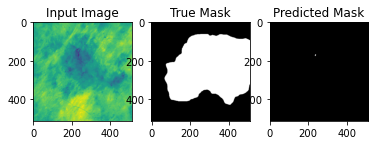

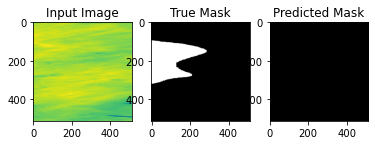

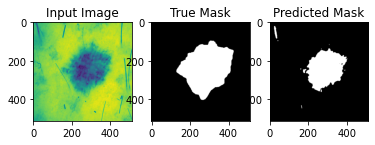

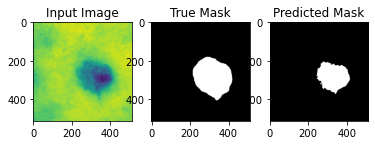

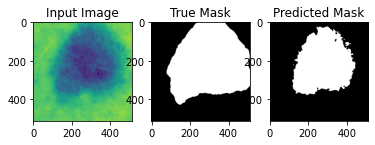

In [20]:
gp2.Util.visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=200) # after 4 runs of GP2